## 讀取檔案

In [3]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

## 讀取檔案

In [15]:
activity_df = pd.read_csv('../data/preprocess/activity.csv')

activity_df.columns

Index(['id', 'title', 'subTitle', 'content', 'addTime', 'createAt', 'fee',
       'holders', 'objectives', 'branches', 'tags', 'seg'],
      dtype='object')

## 只關注標籤 把不必要的部分刪除

In [18]:
activity_df = activity_df.drop(['addTime', 'createAt', 'fee', 'branches', 'subTitle'], axis=1)

activity_df

KeyError: "['addTime', 'createAt', 'fee', 'branches', 'subTitle'] not found in axis"

## Json Normalize tag 屬性

In [19]:
activity_df['tags'] = activity_df['tags'].apply(lambda x: eval(x))  # 使用 eval() 转换字符串为列表

# activity_df['tags'] = activity_df['tags'].apply(json.loads)  # 使用 json.loads() 转换字符串为列表

def extract_tags(tags):
    tag_list = [tag['text'] for tag in tags]  # 提取每個標籤的 "text" 字段值
    tags_str = '|'.join(tag_list)  # 使用 "|" 將標籤連接成一個字串
    return tags_str


activity_df['tag_list'] = activity_df['tags'].apply(extract_tags)
# activity_df.drop('tags', axis=1)

activity_df

,id,title,content,holders,objectives,tags,seg,tag_list
0,badfa9cc-aed2-43df-4d56-08db52fbe02a,第12屆APX全國高中數理能力檢定,檢定分級級別檢定範圍及占分高級A部分，以高一到高三範圍為主，佔100分、B部分，以大學先修範...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",檢定 分級 級別 檢定 範圍 占分 部分 高一 高三 範圍 為主 部分 大學 範圍 為主 中...,化學|生物|數學
1,4625cc40-c153-457e-4d57-08db52fbe02a,青少年帆船2日體驗營,陽光照耀下海面波光粼粼，徜徉在千變萬化的大海裡，體驗帆船的無限魅力，帶領孩子透過體驗及實務操...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",陽光 照耀 海面 波光 粼粼 徜徉 千變萬化 大海 體驗 帆船 無限 魅力 帶領 孩子 體驗...,運動
2,84841d32-fec3-4f35-4d58-08db52fbe02a,2023 成大觀影腦影像數據分析營 第三期,專業師資引導?分析演練實作招生對象全國高中生皆可以報名營隊時間2023/8/26(六)~20...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",專業 師資 引導 分析 演練 實作 招生 對象 高中生 報名 營隊 時間 營隊 地點 成功 ...,心理
3,81a759b6-6e15-465b-4d59-08db52fbe02a,2023 成大第十二期AI人才研修班,課程期別：AI人才研修初階班(112/07/08週六–112/07/09週日)上課人數：上限...,[],[],[],課程 期別 人才 研修 初階班 週六 週日 上課 人數 額滿 為止 適用 對象 高中 高職 ...,
4,b5331379-6197-462b-4d5a-08db52fbe02a,臺大政治營,【何謂模擬選戰】｜總統、國會選戰的精華版｜臺大政治營模擬選戰的設計理念是以「選舉」為主軸的大...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",何謂 模擬 選戰 總統 國會 選戰 精華版 臺大 政治營 模擬 選戰 設計 理念 選舉 主軸...,政治
...,...,...,...,...,...,...,...,...
355,73f16a9e-4aee-46f3-4ec3-08db52fbe02a,2022長庚大學職治營【職有你可以】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!活動地點:長庚大學校園、長庚醫院桃園分院營隊時間...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 地點 大學 校園 醫院 桃園 分院 營隊...,
356,2b8d172d-fba4-43cb-4ec4-08db52fbe02a,2022東吳大學【全國高中生法律營】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!活動時間：111/07/10~111/07/13...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 時間 活動 地點 東吳 大學 外雙溪 校...,
357,0abaa77e-3b32-4de4-4ec5-08db52fbe02a,2022輔仁大學心理營【between us】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊,
358,a625a0e7-ffa9-4986-4ec6-08db52fbe02a,2022中山大學資工營,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!主辦單位：國立中山大學資訊工程學系活動對象：全國...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 主辦 單位 大學 資訊 工程 學系 活動 對象...,


## 存進 activity_tag.csv

In [6]:
activity_df.to_csv('../data/preprocess/activity_tag.csv', index=False)

activity_df = pd.read_csv('../data/preprocess/activity_tag.csv')

activity_df

,id,title,content,holders,objectives,tags,seg,tag_list
0,badfa9cc-aed2-43df-4d56-08db52fbe02a,第12屆APX全國高中數理能力檢定,檢定分級級別檢定範圍及占分高級A部分，以高一到高三範圍為主，佔100分、B部分，以大學先修範...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",檢定 分級 級別 檢定 範圍 占分 部分 高一 高三 範圍 為主 部分 大學 範圍 為主 中...,化學|生物|數學
1,4625cc40-c153-457e-4d57-08db52fbe02a,青少年帆船2日體驗營,陽光照耀下海面波光粼粼，徜徉在千變萬化的大海裡，體驗帆船的無限魅力，帶領孩子透過體驗及實務操...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",陽光 照耀 海面 波光 粼粼 徜徉 千變萬化 大海 體驗 帆船 無限 魅力 帶領 孩子 體驗...,運動
2,84841d32-fec3-4f35-4d58-08db52fbe02a,2023 成大觀影腦影像數據分析營 第三期,專業師資引導?分析演練實作招生對象全國高中生皆可以報名營隊時間2023/8/26(六)~20...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",專業 師資 引導 分析 演練 實作 招生 對象 高中生 報名 營隊 時間 營隊 地點 成功 ...,心理
3,81a759b6-6e15-465b-4d59-08db52fbe02a,2023 成大第十二期AI人才研修班,課程期別：AI人才研修初階班(112/07/08週六–112/07/09週日)上課人數：上限...,[],[],[],課程 期別 人才 研修 初階班 週六 週日 上課 人數 額滿 為止 適用 對象 高中 高職 ...,NaN
4,b5331379-6197-462b-4d5a-08db52fbe02a,臺大政治營,【何謂模擬選戰】｜總統、國會選戰的精華版｜臺大政治營模擬選戰的設計理念是以「選舉」為主軸的大...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",何謂 模擬 選戰 總統 國會 選戰 精華版 臺大 政治營 模擬 選戰 設計 理念 選舉 主軸...,政治
...,...,...,...,...,...,...,...,...
355,73f16a9e-4aee-46f3-4ec3-08db52fbe02a,2022長庚大學職治營【職有你可以】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!活動地點:長庚大學校園、長庚醫院桃園分院營隊時間...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 地點 大學 校園 醫院 桃園 分院 營隊...,NaN
356,2b8d172d-fba4-43cb-4ec4-08db52fbe02a,2022東吳大學【全國高中生法律營】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!活動時間：111/07/10~111/07/13...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 時間 活動 地點 東吳 大學 外雙溪 校...,NaN
357,0abaa77e-3b32-4de4-4ec5-08db52fbe02a,2022輔仁大學心理營【between us】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊,NaN
358,a625a0e7-ffa9-4986-4ec6-08db52fbe02a,2022中山大學資工營,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!主辦單位：國立中山大學資訊工程學系活動對象：全國...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 主辦 單位 大學 資訊 工程 學系 活動 對象...,NaN


## Draw

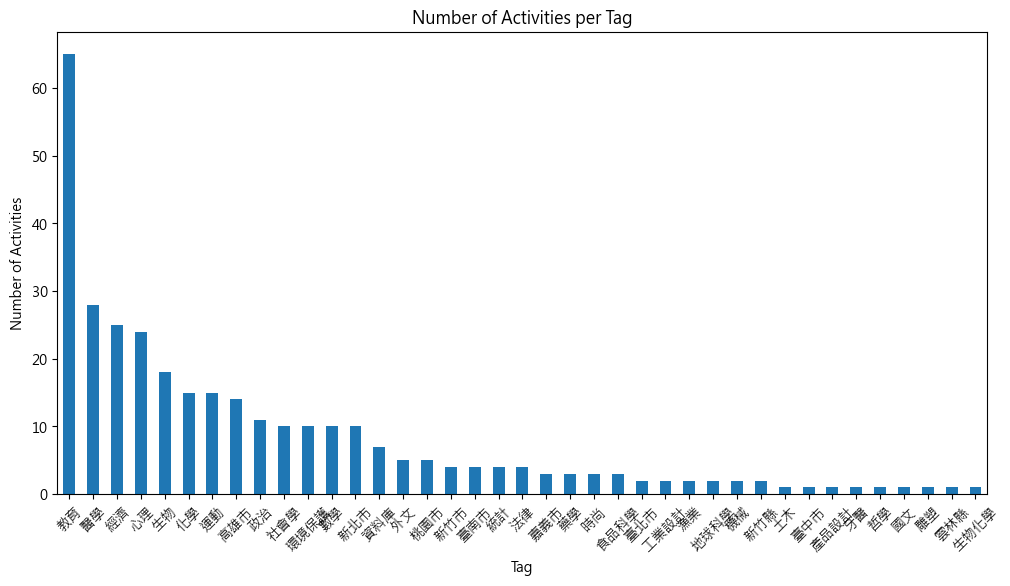

In [20]:
import matplotlib.pyplot as plt

# 計算每個標籤對應的活動數量
tag_counts = activity_df["tag_list"].str.get_dummies('|').sum().sort_values(ascending=False)

# 設定全域字型
plt.rcParams['font.family'] = 'Microsoft JhengHei'  # 替換為包含繁體中文的字型名稱

# 繪製條形圖
plt.figure(figsize=(12, 6))
tag_counts.plot(kind='bar')
plt.title("Number of Activities per Tag")
plt.xlabel("Tag")
plt.ylabel("Number of Activities")
plt.xticks(rotation=45)
plt.show()


## 分類標籤

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# 訓練數據（假設您已經完成訓練）
train_data = [
    {"seg": "數學 戶外 醫療", "tag_list": ["數學", "戶外", "醫療"]},
    {"seg": "化學 資料庫", "tag_list": ["化學", "資料庫"]},
    # 其他訓練樣本...
]

# 將訓練數據轉換為 DataFrame
train_df = pd.DataFrame(train_data)

# 將活動內容和標籤分開
X_train = train_df["seg"]
y_train = train_df["tag_list"]

# 將標籤轉換為二進制的多維標籤表示形式
label_binarizer = MultiLabelBinarizer()
y_train_binary = label_binarizer.fit_transform(y_train)

# 自定義預處理函式
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    return text.lower()

# 將所有資料轉換為字串類型
new_data = [preprocess_text(data) for data in new_data]

# 定義文本特徵提取和分類器
vectorizer = TfidfVectorizer(preprocessor=preprocess_text)
classifier = MultinomialNB()

# 建立多標籤分類器的管道
pipeline = Pipeline([
    ('vect', vectorizer),  # 特徵提取
    ('clf', MultiOutputClassifier(classifier)),  # 多標籤分類器
])

# 在訓練數據上訓練模型
pipeline.fit(X_train, y_train_binary)

# 新的待預測的活動內容
new_data = [
    "數學 教學 活動",
    "醫療 健康 講座",
    # 其他待預測樣本...
]

# 將新的活動內容進行特徵提取
X_new = vectorizer.transform(new_data)

# 使用訓練好的模型對新的活動內容進行預測
predicted_labels_binary = pipeline.predict(X_new)

# 將預測的二進制標籤轉換回原始的標籤表示形式
predicted_labels = label_binarizer.inverse_transform(predicted_labels_binary)

# 輸出預測結果
for i, data in enumerate(new_data):
    print("活動內容:", data)
    predicted_labels_subset = [label for label in predicted_labels[i] if label in data]
    print("預測標籤:", '|'.join(predicted_labels_subset))
    print()

活動內容: 數學 教學 活動
預測標籤: 

活動內容: 醫療 健康 講座
預測標籤: 



In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB

# 获取带有标签的活动数据集
labeled_activities = activity_df[activity_df['tag_list'] != '']

# 分割数据集为训练集和测试集
train_data = labeled_activities['seg']
train_labels = [tags.split('|') for tags in labeled_activities['tag_list']]
test_data = activity_df.loc[activity_df['tag_list'] == '', 'seg']

print(train_labels)
assert(train_data.size == len(train_labels))

# 将标签进行二进制编码
label_binarizer = MultiLabelBinarizer()
train_labels_binary = label_binarizer.fit_transform(train_labels)

train_labels_binary = train_labels_binary.ravel()  # 转换为1维数组

print("标签数量:", len(label_binarizer.classes_))
print("编码后特征的维度:", train_labels_binary.shape[0])

# 使用 TF-IDF 特征向量化文本数据
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# 训练多标签分类器（使用朴素贝叶斯分类器）
classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels_binary)

# 预测缺失标签的活动
predicted_labels_binary = classifier.predict(test_vectors)

# 将二进制预测结果转换为标签
predicted_labels = label_binarizer.inverse_transform(predicted_labels_binary)

# 将预测结果添加到活动数据集中
test_df.loc[activity_df['tag_list'] == '', 'tag_list'] = predicted_labels

test_df

[['化學', '生物', '數學'], ['運動'], ['心理'], ['政治'], ['教育', '心理'], ['經濟', '生物'], ['運動'], ['工業設計'], ['運動'], ['醫學'], ['新北市'], ['教育', '心理'], ['外文'], ['社會學'], ['教育', '心理'], ['醫學', '臺北市'], ['經濟'], ['醫學'], ['教育'], ['教育', '社會學'], ['時尚'], ['教育', '運動', '生物', '醫學', '藥學', '高雄市'], ['教育'], ['教育'], ['新竹市'], ['政治'], ['環境保護'], ['環境保護'], ['環境保護'], ['高雄市'], ['經濟', '新北市', '地球科學'], ['數學'], ['教育', '化學'], ['教育'], ['教育', '資料庫'], ['教育'], ['教育', '資料庫'], ['教育', '運動'], ['教育', '資料庫', '化學'], ['新竹市'], ['心理'], ['經濟'], ['心理'], ['心理'], ['經濟', '漁業'], ['教育'], ['心理'], ['嘉義市'], ['社會學'], ['醫學', '桃園市'], ['桃園市'], ['經濟'], ['教育'], ['外文'], ['政治'], ['政治'], ['食品科學'], ['教育', '數學'], ['教育', '醫學', '臺南市'], ['醫學'], ['化學', '生物', '數學'], ['運動'], ['心理'], ['政治'], ['教育', '心理'], ['經濟', '生物'], ['運動'], ['工業設計'], ['運動'], ['醫學'], ['新北市'], ['教育', '心理'], ['外文'], ['社會學'], ['教育', '心理'], ['醫學', '臺北市'], ['經濟'], ['醫學'], ['教育'], ['教育', '社會學'], ['時尚'], ['教育', '運動', '生物', '醫學', '藥學', '高雄市'], ['教育'], ['教育'], ['新竹市'], ['政治'], ['環境保護'], ['環境保護'], ['環境保護'], ['高雄市'], [

ValueError: Found input variables with inconsistent numbers of samples: [206, 8034]

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline

# 活動內容和標籤的訓練數據
train_data = [
    ("數學 戶外 醫療", "數學|戶外|醫療"),
    ("化學 資料庫", "化學|資料庫"),
    # 其他訓練樣本...
]

# 將活動內容和標籤分開
X_train = [data[0] for data in train_data]
y_train_str = [data[1] for data in train_data]

# 將標籤轉換為二進制的多維標籤表示形式
label_binarizer = MultiLabelBinarizer()
y_train = label_binarizer.fit_transform([labels.split('|') for labels in y_train_str])

# 定義文本特徵提取和分類器
vectorizer = CountVectorizer()
classifier = MultinomialNB()

# 建立多標籤分類器的管道
pipeline = Pipeline([
    ('vect', vectorizer),  # 特徵提取
    ('clf', MultiOutputClassifier(classifier)),  # 多標籤分類器
])

# 在訓練數據上訓練模型
pipeline.fit(X_train, y_train)

# 待預測的活動內容
test_data = [
    "數學 教學 活動",
    "醫療 健康 講座",
    # 其他待預測樣本...
]

# 使用訓練好的模型對活動內容進行預測
predicted_labels_binary = pipeline.predict(test_data)

# 將二進制的多維標籤轉換回原始的標籤表示形式
predicted_labels = label_binarizer.inverse_transform(predicted_labels_binary)

# 輸出預測結果
for i, data in enumerate(test_data):
    print("活動內容:", data)
    predicted_labels_subset = [label for label in predicted_labels[i] if label in data]
    print("預測標籤:", '|'.join(predicted_labels_subset))
    print()

活動內容: 數學 教學 活動
預測標籤: 數學

活動內容: 醫療 健康 講座
預測標籤: 醫療



## 確認標籤是否分類正確

In [47]:
raw_activity = pd.read_csv('../data/raw/activity.csv')

# print(raw_activity.loc[raw_activity.index == 3]['content'])
# print(activity_df.loc[activity_df.index == 357]['tag_list'])
activity_df.loc[activity_df['tag_list'] == '教育']

,id,title,holders,objectives,tags,seg,tag_list
3,81a759b6-6e15-465b-4d59-08db52fbe02a,2023 成大第十二期AI人才研修班,[],[],[],課程 期別 人才 研修 初階班 週六 週日 上課 人數 額滿 為止 適用 對象 高中 高職 ...,教育
5,2668c627-d2d2-4d24-4d5b-08db52fbe02a,2023中正大學勞工營,[],[],[],大學 擁有 勞工系 大學 更多 知道 勞工系 了解 高中生 大學 科系 選擇 生涯 規劃 提...,教育
7,a3cedaa1-2915-4d25-4d5d-08db52fbe02a,2023陽明交通大學管科卓越營,[],[],[],未來 感到 迷茫 眾多 科系 優感 無所適從 想要 成為 文理 多邊形 戰士 暑假 漫漫 時...,教育
11,582bff5c-8716-4dbd-4d61-08db52fbe02a,AI4kids- 2023 暑假青少年音樂專題實作營,[],[],[],中研院 老師 研究 團隊 清大 樂團 總監 老師 科技 團隊 帶領 學員 進入 音樂 世界 ...,教育
12,63854ba0-c37b-4cd5-4d62-08db52fbe02a,2023成大文藝營,[],[],[],成大 文藝營 面劇 成大 文藝營 文學 創作 認識 看見 舞台 營隊 課程 內容 含括 戲劇...,教育
...,...,...,...,...,...,...,...
352,33c6a682-acca-408b-4ec0-08db52fbe02a,2022 多元半導體產業人才職前培訓班,[],[],[],交通 大學 勞動部 合辦 半導體 產業 專業 人才 發展 基地 培訓班 熱烈 報名 登記 參...,教育
355,73f16a9e-4aee-46f3-4ec3-08db52fbe02a,2022長庚大學職治營【職有你可以】,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 地點 大學 校園 醫院 桃園 分院 營隊...,教育
356,2b8d172d-fba4-43cb-4ec4-08db52fbe02a,2022東吳大學【全國高中生法律營】,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 時間 活動 地點 東吳 大學 外雙溪 校...,教育
357,0abaa77e-3b32-4de4-4ec5-08db52fbe02a,2022輔仁大學心理營【between us】,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊,教育


## 讀取處理完標籤的檔案

In [4]:
activity_df = pd.read_csv('../data/preprocess/activity_tag.csv')

activity_df

,id,title,content,holders,objectives,tags,seg,tag_list
0,badfa9cc-aed2-43df-4d56-08db52fbe02a,第12屆APX全國高中數理能力檢定,檢定分級級別檢定範圍及占分高級A部分，以高一到高三範圍為主，佔100分、B部分，以大學先修範...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",檢定 分級 級別 檢定 範圍 占分 部分 高一 高三 範圍 為主 部分 大學 範圍 為主 中...,化學|生物|數學
1,4625cc40-c153-457e-4d57-08db52fbe02a,青少年帆船2日體驗營,陽光照耀下海面波光粼粼，徜徉在千變萬化的大海裡，體驗帆船的無限魅力，帶領孩子透過體驗及實務操...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",陽光 照耀 海面 波光 粼粼 徜徉 千變萬化 大海 體驗 帆船 無限 魅力 帶領 孩子 體驗...,運動
2,84841d32-fec3-4f35-4d58-08db52fbe02a,2023 成大觀影腦影像數據分析營 第三期,專業師資引導?分析演練實作招生對象全國高中生皆可以報名營隊時間2023/8/26(六)~20...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",專業 師資 引導 分析 演練 實作 招生 對象 高中生 報名 營隊 時間 營隊 地點 成功 ...,心理
3,81a759b6-6e15-465b-4d59-08db52fbe02a,2023 成大第十二期AI人才研修班,課程期別：AI人才研修初階班(112/07/08週六–112/07/09週日)上課人數：上限...,[],[],[],課程 期別 人才 研修 初階班 週六 週日 上課 人數 額滿 為止 適用 對象 高中 高職 ...,NaN
4,b5331379-6197-462b-4d5a-08db52fbe02a,臺大政治營,【何謂模擬選戰】｜總統、國會選戰的精華版｜臺大政治營模擬選戰的設計理念是以「選舉」為主軸的大...,[],[],"[{'trend': 0, 'tagVoteCount': 0, 'userVoted': ...",何謂 模擬 選戰 總統 國會 選戰 精華版 臺大 政治營 模擬 選戰 設計 理念 選舉 主軸...,政治
...,...,...,...,...,...,...,...,...
355,73f16a9e-4aee-46f3-4ec3-08db52fbe02a,2022長庚大學職治營【職有你可以】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!活動地點:長庚大學校園、長庚醫院桃園分院營隊時間...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 地點 大學 校園 醫院 桃園 分院 營隊...,NaN
356,2b8d172d-fba4-43cb-4ec4-08db52fbe02a,2022東吳大學【全國高中生法律營】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!活動時間：111/07/10~111/07/13...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 活動 時間 活動 地點 東吳 大學 外雙溪 校...,NaN
357,0abaa77e-3b32-4de4-4ec5-08db52fbe02a,2022輔仁大學心理營【between us】,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊,NaN
358,a625a0e7-ffa9-4986-4ec6-08db52fbe02a,2022中山大學資工營,相關問題請至此營隊粉絲團，查詢聯絡人資訊!!主辦單位：國立中山大學資訊工程學系活動對象：全國...,[],[],[],相關 問題 營隊 粉絲團 查詢 聯絡人 資訊 主辦 單位 大學 資訊 工程 學系 活動 對象...,NaN



## 活動的特徵是 tags 這個欄位，而我們注意到此時是以 `|` 符號將多個類型串接在一起的文字，電腦只能夠處理數值，我們使用獨熱編碼(One Hot Encoder)轉成數值格式。


In [5]:
# activity vector
tags = activity_df["tag_list"].str.get_dummies('|')
activity_vector = pd.concat([activity_df['id'], tags], axis=1)
activity_vector.set_index("id", inplace=True)

# activity_vector.head(15)
activity_vector.columns

Index(['化學', '哲學', '嘉義市', '國文', '土木', '地球科學', '外文', '工業設計', '心理', '政治', '教育',
       '數學', '新北市', '新竹市', '新竹縣', '時尚', '桃園市', '機械', '法律', '漁業', '牙醫', '環境保護',
       '生物', '生物化學', '產品設計', '社會學', '統計', '經濟', '臺中市', '臺北市', '臺南市', '藥學',
       '資料庫', '運動', '醫學', '雕塑', '雲林縣', '食品科學', '高雄市'],
      dtype='object')

## 創建一個使用者的歷史紀錄

In [6]:
data = {
    'userId': 1,
    'activityId': ['b5331379-6197-462b-4d5a-08db52fbe02a', 'badfa9cc-aed2-43df-4d56-08db52fbe02a', '84841d32-fec3-4f35-4d58-08db52fbe02a']
}

user_history = pd.DataFrame(data)

user_history

,userId,activityId
0,1,b5331379-6197-462b-4d5a-08db52fbe02a
1,1,badfa9cc-aed2-43df-4d56-08db52fbe02a
2,1,84841d32-fec3-4f35-4d58-08db52fbe02a


## 同樣用 one-hot-encoding 來處理標籤

In [7]:
def map_activity_id_to_title_content(activity_df, recommendations):
    # 从活动数据框中获取推荐的活动标题和内容
    recommended_activities = activity_df.loc[activity_df['id'].isin(recommendations), ['title', 'tag_list']]
    
    return recommended_activities

In [54]:
# 准备数据
data = {
    'userId': 1,
    'id': ['84841d32-fec3-4f35-4d58-08db52fbe02a', 'badfa9cc-aed2-43df-4d56-08db52fbe02a', '0abaa77e-3b32-4de4-4ec5-08db52fbe02a', '0b9c92ff-ba94-4527-4ec7-08db52fbe02a', '2ddebbf4-de67-49d0-4d64-08db52fbe02a']
}
user_history = pd.DataFrame(data)
user_history = pd.merge(user_history[["userId","id"]], activity_df[["id","tag_list"]], on='id')

# 进行独热编码并设置索引
tags = user_history["tag_list"].str.get_dummies('|')
user_vec = pd.DataFrame(columns=activity_vector.columns)
user_vec = pd.concat([user_history, tags], axis=1)
user_vec.drop(['id', 'tag_list'], axis=1, inplace=True)

user_vec = user_vec.groupby("userId").mean()

# 將 user_vec 的欄位改為 activity_vector 的欄位
user_vec = user_vec.reindex(columns=activity_vector.columns, fill_value=0)

# user_vec
user_activity_similarity_matrix = cosine_similarity(user_vec.values, activity_vector.values)

# 获取相似度最高的活动索引
similar_indices = np.argsort(user_activity_similarity_matrix[0])[::-1]

user_activity_ids = data['id']

# 过滤和推荐活动
num_recommendations = 30
recommendations = []
for index in similar_indices:
    activity_id = activity_vector.index[index]
    if activity_id not in user_activity_ids:
        recommendations.append(activity_id)
        if len(recommendations) == num_recommendations:
            break

recommendations

# 将推荐的活动ID映射到标题和内容
recommended_activities = map_activity_id_to_title_content(activity_df, recommendations)
user_activity = map_activity_id_to_title_content(activity_df, data['id'])
print(user_activity)
print()
print(recommended_activities)

                          title  tag_list
0             第12屆APX全國高中數理能力檢定  化學|生物|數學
2         2023 成大觀影腦影像數據分析營 第三期        心理
14   AI4kids- 2023 暑假青少年醫療專題實作營        醫學
357     2022輔仁大學心理營【between us】       NaN
359                   2022臺大公衛營     生物|統計

                                      title            tag_list
8                AI4kids- 2023 暑假青少年海生專題實作營               經濟|生物
38                              臺北醫學大學飛躍醫學營                  醫學
44                            2023暑假高醫少年醫學營  教育|運動|生物|醫學|藥學|高雄市
72       2023夏令營｜七月梯 Smart Camp青少年成長營（過夜營隊）                  心理
74    2023夏令營｜青少年高山曠野營07/04(二)-07(五) (過夜營隊)                  心理
78                           2023蘭陽心理營—竊心之美                  心理
100                       第12屆APX全國高中數理能力檢定            化學|生物|數學
102                   2023 成大觀影腦影像數據分析營 第三期                  心理
108              AI4kids- 2023 暑假青少年海生專題實作營               經濟|生物
144                           2023暑假高醫少年醫學營  教育|運動|生物|醫學|藥學|高雄市
178                          2023蘭陽心理營—竊心之美

In [55]:
# 將原本的活動ID接在一起
matching_rows = activity_df.loc[activity_df.index.isin(recommended_activities.index)]

# user_activity_res = pd.merge(matching_rows, activity_df['id'], left_index=True, right_index=True)
# user_activity_res.drop(['title', 'content', 'holders', 'objectives', 'tags', 'seg', 'tag_list'], axis=1, inplace=True)
# user_activity_id = user_activity_res.reset_index().rename(columns={'index': 'activity_id'})


# 轉成 json 輸出
# recommended_activities = json.dumps(user_activity_id.id.values.tolist())

# print(recommended_activities)
matching_rows.id.values.tolist()

['ba3538b0-32df-4976-4d5e-08db52fbe02a',
 '89187e5f-16ba-4e98-4d7c-08db52fbe02a',
 '6a56dd41-3cf7-4ca6-4d82-08db52fbe02a',
 '6ebb6714-4131-484f-4d9e-08db52fbe02a',
 'dd6f0e1c-6da5-4c5b-4da0-08db52fbe02a',
 'b2a4ee36-dac4-4fae-4da4-08db52fbe02a',
 '6a175d9a-a69a-4bc3-4dba-08db52fbe02a',
 'e9fe5997-596b-433f-4dbc-08db52fbe02a',
 'f5f4de98-5bfb-4730-4dc2-08db52fbe02a',
 '3737a6d3-6737-4a56-4de6-08db52fbe02a',
 'bbd55f28-5877-4c03-4e08-08db52fbe02a',
 'c392c518-0081-4007-4e1b-08db52fbe02a',
 '8f8e4f5e-dc4c-4143-4e21-08db52fbe02a',
 '7b223fb4-7fd4-4d44-4e2a-08db52fbe02a',
 '27c96217-d132-4e16-4e2c-08db52fbe02a',
 '7a3e2594-db56-4662-4e2d-08db52fbe02a',
 '31077cf9-4a0b-4498-4e30-08db52fbe02a',
 'bd8d53ed-68af-4536-4e3b-08db52fbe02a',
 '5d46a01a-b830-49e6-4e3d-08db52fbe02a',
 '114b578a-d632-42dd-4e3e-08db52fbe02a',
 '815475e2-eeac-417a-4e56-08db52fbe02a',
 '45ff2774-c90e-49bb-4e6b-08db52fbe02a',
 '9c00120d-7d16-459e-4e79-08db52fbe02a',
 '172879b1-607d-4b1d-4e7a-08db52fbe02a',
 'ffc6f8e3-4eb7-

In [13]:
data = {
        'userId': 1,
        'id': ['84841d32-fec3-4f35-4d58-08db52fbe02a',      'badfa9cc-aed2-43df-4d56-08db52fbe02a', '0abaa77e-3b32-4de4-4ec5-08db52fbe02a', '0b9c92ff-ba94-4527-4ec7-08db52fbe02a', '2ddebbf4-de67-49d0-4d64-08db52fbe02a']
    }
    
user_history = pd.DataFrame(data)
    
user_history = pd.merge(user_history[["userId","id"]], activity_df[["id","tag_list"]], on='id')

# 进行独热编码并设置索引
tags = user_history["tag_list"].str.get_dummies('|')
user_vec = pd.DataFrame(columns=activity_vector.columns)
user_vec = pd.concat([user_history, tags], axis=1)
user_vec.drop(['id', 'tag_list'], axis=1, inplace=True)

user_vec = user_vec.groupby("userId").mean()

user_vec

,化學,心理,數學,生物,統計,醫學
userId,,,,,,
1,0.2,0.2,0.2,0.4,0.2,0.2


In [18]:
data = [
    {
        'userId': 1,
        'id': ['84841d32-fec3-4f35-4d58-08db52fbe02a',      'badfa9cc-aed2-43df-4d56-08db52fbe02a', '0abaa77e-3b32-4de4-4ec5-08db52fbe02a', '0b9c92ff-ba94-4527-4ec7-08db52fbe02a', '2ddebbf4-de67-49d0-4d64-08db52fbe02a']
    },
    {
        'userId': 2,
        'id': ['0abaa77e-3b32-4de4-4ec5-08db52fbe02a', '0b9c92ff-ba94-4527-4ec7-08db52fbe02a', '2ddebbf4-de67-49d0-4d64-08db52fbe02a']
    },
]


user_history = pd.DataFrame(data[0])

user_history

,userId,id
0,1,84841d32-fec3-4f35-4d58-08db52fbe02a
1,1,badfa9cc-aed2-43df-4d56-08db52fbe02a
2,1,0abaa77e-3b32-4de4-4ec5-08db52fbe02a
3,1,0b9c92ff-ba94-4527-4ec7-08db52fbe02a
4,1,2ddebbf4-de67-49d0-4d64-08db52fbe02a
